In [ ]:
!pip install minihack gym==0.23.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.2/626.2 kB 13.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.23.1-py3-none-any.whl size=701466 sha256=1050036dc553ca777d0e4de2f0bae3426ba1fb0015d5eadd8e6cd84ee44ebc6a
  Stored in directory: /root/.cache/pip/wheels/5b/dd/a4/b1860cec4c1751b5a84c31e2abc3b88bd71e11c1df79b73986
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [ ]:
!pip install stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pip install cmake

In [ ]:
!apt-get install -y libgl1-mesa-glx

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgl1-mesa-glx is already the newest version (23.0.4-0ubuntu1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
import gymnasium as gym
import minihack
from minihack.envs.room import MiniHackRoom5x5
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

In [ ]:
from minihack import MiniHackNavigation
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

def make_env():
    return gym.make("MiniHack-KeyRoom-S5", render_mode="ansi")

env = DummyVecEnv([make_env])

/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:525: UserWarning: WARN: Using the latest versioned environment `MiniHack-KeyRoom-S5-v0` instead of the unversioned environment `MiniHack-KeyRoom-S5`.
  logger.warn(


In [ ]:
model = PPO("MultiInputPolicy", env, verbose=1)

model.learn(total_timesteps=10_000)

Using cuda device
-----------------------------
| time/              |      |
|    fps             | 311  |
|    iterations      | 1    |
|    time_elapsed    | 6    |
|    total_timesteps | 2048 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 287        |
|    iterations           | 2          |
|    time_elapsed         | 14         |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01818454 |
|    clip_fraction        | 0.183      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.29      |
|    explained_variance   | -0.0445    |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0036     |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.0138    |
|    value_loss           | 0.0322     |
----------------------------------------
----------------------------------

In [ ]:
rewardsArr = []

obs = env.reset()
for _ in range(1000):
    action, _ = model.predict(obs)
    obs, rewards, dones, infos = env.step(action)
    rewardsArr.append(rewards)
    if (rewards == 1):
      break
    frame = env.get_attr('render')[0]()
    print(frame)

Streaming output truncated to the last 5000 lines.
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                       ----                                    
                                       +..|                          

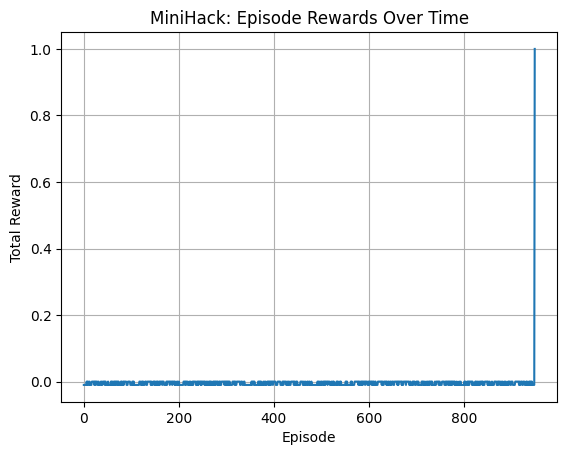

In [ ]:
import matplotlib.pyplot as plt

plt.plot(rewardsArr)
plt.title("MiniHack: Episode Rewards Over Time")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()

In [ ]:
from minihack import MiniHackNavigation
from gymnasium.envs.registration import register

register(
    id="MiniHack-CustomGoal-v0",
    entry_point="minihack.envs:MiniHackNavigation",
    kwargs={
        "observation_keys": ("glyphs", "chars", "message"),
        "reward_win": 1,
        "reward_lose": 0,
        "penalty_step": 0,
        "max_episode_steps": 100,
        "desc": "5x5",
    },
)


In [ ]:
# import numpy as np

# class KeyRoomSymbolicAgent:
#     def __init__(self):
#         self.goal_char = ord(">")
#         self.key_char = ord("k")
#         self.door_char = ord("+")
#         self.has_key = False
#         self.phase = "key"

#     def find_pos(self, chars, target):
#         ys, xs = np.where(chars == target)
#         if len(xs) > 0:
#             return (xs[0], ys[0])
#         return None

#     def step_toward(self, current, target):
#         dx = target[0] - current[0]
#         dy = target[1] - current[1]
#         if abs(dx) > abs(dy):
#             return 4 if dx > 0 else 3
#         else:
#             return 2 if dy > 0 else 1

#     def act(self, obs):
#         chars = obs["chars"]
#         agent_pos = self.find_pos(chars, ord("@"))
#         if agent_pos is None:
#             return 0

#         if self.phase == "key":
#             key_pos = self.find_pos(chars, self.key_char)
#             if key_pos:
#                 if agent_pos == key_pos:
#                     self.has_key = True
#                     self.phase = "door"
#                 else:
#                     return self.step_toward(agent_pos, key_pos)

#         if self.phase == "door":
#             door_pos = self.find_pos(chars, self.door_char)
#             if door_pos:
#                 if agent_pos == door_pos:
#                     self.phase = "goal"
#                 else:
#                     return self.step_toward(agent_pos, door_pos)

#         if self.phase == "goal":
#             goal_pos = self.find_pos(chars, self.goal_char)
#             if goal_pos:
#                 return self.step_toward(agent_pos, goal_pos)

#         return 0

In [ ]:
import numpy as np

class KeyRoomSymbolicAgent:
    def __init__(self):
        self.goal_char = ord("<")
        self.key_char = ord("(")
        self.door_char = ord("+")
        self.wall_char = ord("|")  # Assuming walls are represented by '#'
        self.has_key = False
        self.phase = "key"

    def find_pos(self, chars, target):
        ys, xs = np.where(chars == target)
        if len(xs) > 0:
            return (xs[0], ys[0])
        return None

    def step_toward(self, current, target):
        # Calculate the best move to make towards the target (key, door, goal)
        dx = target[0] - current[0]  # x-axis difference (left/right)
        dy = target[1] - current[1]  # y-axis difference (up/down)

        if dx == 0 and dy == 0:
          return 0
        if abs(dx) > abs(dy):  # Prefer horizontal movement (left/right)
            if dx > 0:
                return 4  # Right
            else:
                return 3  # Left
        else:  # Prefer vertical movement (up/down)
            if dy > 0:
                return 2  # Down
            else:
                return 1  # Up

    def is_valid_move(self, chars, position):
        # Check if the next move is valid (not out of bounds or a wall)
        x, y = position
        if x < 0 or y < 0 or x >= chars.shape[1] or y >= chars.shape[0]:
            return False
        if chars[y, x] == self.wall_char:
            return False
        return True

    def act(self, obs):
        chars = obs["chars"]
        agent_pos = self.find_pos(chars, ord("@"))
        if agent_pos is None:
            return 0

        print(f"Agent position: {agent_pos}, Phase: {self.phase}")
        # if int(agent_pos[0]) == int(key_pos[0]) and int(agent_pos[1]) == int(key_pos[1]):
        #       print("true")
        if self.phase == "key":
            key_pos = self.find_pos(chars, self.key_char)
            print(f"Key position: {key_pos}")

            if key_pos:
                if agent_pos == key_pos:
                    self.has_key = True
                    self.phase = "door"
                    print("Key collected! Transitioning to door phase.")
                else:
                    next_move = self.step_toward(agent_pos, key_pos)
                    new_pos = self.get_new_pos(agent_pos, next_move)
                    if self.is_valid_move(chars, new_pos):
                        return next_move
                    else:
                        return 0  # Stay if the next position is invalid
            else:
              print("Has key in possession. Transitioning to door phase!")
              self.has_key = True
              self.phase = "door"

        elif self.phase == "door":
            door_pos = self.find_pos(chars, self.door_char)
            if door_pos:
                print(f"Door position: {door_pos}")
                if agent_pos == door_pos:
                    self.phase = "goal"
                    print("Door opened! Transitioning to goal phase.")
                else:
                    next_move = self.step_toward(agent_pos, door_pos)
                    new_pos = self.get_new_pos(agent_pos, next_move)
                    if self.is_valid_move(chars, new_pos):
                        return next_move
                    else:
                        return 0
            else:
              print("Reached door! Transitioning to goal phase!")
              self.phase = "goal"

        elif self.phase == "goal":
            goal_pos = self.find_pos(chars, self.goal_char)
            if goal_pos:
                print(f"Goal position: {goal_pos}")
                next_move = self.step_toward(agent_pos, goal_pos)
                new_pos = self.get_new_pos(agent_pos, next_move)
                if self.is_valid_move(chars, new_pos):
                    return next_move
                else:
                    return 0


        return 0

    def get_new_pos(self, current, move):
        # Get new position after the move is chosen
        if move == 1:  # Up
            return (current[0], current[1] - 1)
        elif move == 2:  # Down
            return (current[0], current[1] + 1)
        elif move == 3:  # Left
            return (current[0] - 1, current[1])
        elif move == 4:  # Right
            return (current[0] + 1, current[1])
        return current


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import time

# class KeyRoomSymbolicAgent:
#     def __init__(self):
#         self.goal_char = ord(" ")
#         self.key_char = ord("(")
#         self.door_char = ord("+")
#         self.wall_char = ord("|")
#         self.floor_char = ord("_")
#         self.has_key = False
#         self.phase = "key"

#     def find_pos(self, chars, target):
#         ys, xs = np.where(chars == target)
#         if len(xs) > 0:
#             return (xs[0], ys[0])
#         return None

#     def step_toward(self, current, target):
#         dx = target[0] - current[0]  # x-axis difference (left/right)
#         dy = target[1] - current[1]  # y-axis difference (up/down)

#         if abs(dx) > abs(dy):  # Prefer horizontal movement (left/right)
#             if dx < 0:  # Target is left of the agent
#                 return 3  # Left
#             elif dx > 0:  # Target is right of the agent
#                 return 4  # Right
#         else:  # Prefer vertical movement (up/down)
#             if dy < 0:  # Target is above the agent
#                 return 1  # Up
#             elif dy > 0:  # Target is below the agent
#                 return 2  # Down
#         return 0

#     def is_valid_move(self, chars, position):
#         x, y = position
#         if x < 0 or y < 0 or x >= chars.shape[1] or y >= chars.shape[0]:
#             return False
#         if chars[y, x] == self.wall_char or chars[y, x] == self.floor_char:
#             return False
#         return True

#     def act(self, obs):
#         chars = obs["chars"]
#         agent_pos = self.find_pos(chars, ord("@"))
#         print(f"Agent position: {agent_pos}, Phase: {self.phase}")
#         if agent_pos is None:
#             return 0

#         if self.phase == "key":
#             key_pos = self.find_pos(chars, self.key_char)
#             print(f"Key position: {key_pos}")
#             if key_pos:
#                 if agent_pos == key_pos:
#                     self.has_key = True
#                     self.phase = "door"
#                 else:
#                     next_move = self.step_toward(agent_pos, key_pos)
#                     new_pos = self.get_new_pos(agent_pos, next_move)
#                     if self.is_valid_move(chars, new_pos):
#                         return next_move
#                     else:
#                         return 0

#         elif self.phase == "door":
#             door_pos = self.find_pos(chars, self.door_char)
#             if door_pos:
#                 if agent_pos == door_pos:
#                     self.phase = "goal"
#                 else:
#                     next_move = self.step_toward(agent_pos, door_pos)
#                     new_pos = self.get_new_pos(agent_pos, next_move)
#                     if self.is_valid_move(chars, new_pos):
#                         return next_move
#                     else:
#                         return 0

#         elif self.phase == "goal":
#             goal_pos = self.find_pos(chars, self.goal_char)
#             if goal_pos:
#                 next_move = self.step_toward(agent_pos, goal_pos)
#                 new_pos = self.get_new_pos(agent_pos, next_move)
#                 if self.is_valid_move(chars, new_pos):
#                     return next_move
#                 else:
#                     return 0

#         return 0

#     def get_new_pos(self, current, move):
#         if move == 1:  # Up
#             return (current[0], current[1] - 1)
#         elif move == 2:  # Down
#             return (current[0], current[1] + 1)
#         elif move == 3:  # Left
#             return (current[0] - 1, current[1])
#         elif move == 4:  # Right
#             return (current[0] + 1, current[1])
#         return current

#     # def render(self, chars, agent_pos):
#     #     # Create a copy of the environment to update the agent's position
#     #     env_copy = chars.copy()

#     #     # Mark the agent's current position
#     #     env_copy[agent_pos[1], agent_pos[0]] = ord('@')

#     #     # Plot the environment
#     #     plt.imshow(env_copy, cmap="gray", interpolation="nearest")
#     #     plt.axis('off')  # Turn off the axis
#     #     plt.pause(0.1)   # Pause to update the plot


In [ ]:
import numpy as np
import gymnasium as gym
import minihack
from minihack import LevelGenerator
from gymnasium.envs.toy_text.utils import categorical_sample

class KeyRoomSymbolicAgent:
    def __init__(self):
        self.has_key = False
        self.phase = "get_key"  # Other phases: "unlock_door", "go_to_goal"
        self.key_char = ord("(")
        self.door_char = ord("+")
        self.goal_char = ord("<")
        self.agent_char = ord("@")

    def find_pos(self, chars, target):
        ys, xs = np.where(chars == target)
        if len(xs) > 0:
            return (xs[0], ys[0])
        return None

    def step_toward(self, current, target):
        # Handle case where target is None
        if target is None:
            return 0  # Wait or any other default action

        dx = target[0] - current[0]
        dy = target[1] - current[1]
        if abs(dx) >= abs(dy):
            return 6 if dx > 0 else 4  # Right : Left
        elif dy != 0:
            return 8 if dy < 0 else 2  # Up : Down
        else:
            return 0  # Wait

    def act(self, obs):
        chars = obs["chars"]
        #print(f"Chars: {chars}")
        agent_pos = self.find_pos(chars, self.agent_char)
        print(f"Agent position: {agent_pos}, Phase: {self.phase}")

        #print(f"Phase: {self.phase}")
        if self.phase == "get_key":
            key_pos = self.find_pos(chars, self.key_char)
            print(f"Key position: {key_pos}")
            if key_pos is None or agent_pos == key_pos:
                self.has_key = True
                self.phase = "unlock_door"
                return 0  # Wait
            return self.step_toward(agent_pos, key_pos)

        elif self.phase == "unlock_door":
            door_pos = self.find_pos(chars, self.door_char)
            print(f"Door position: {door_pos}")
            if door_pos is None:
                self.phase = "go_to_goal"
                return 0  # Wait (symbolizes unlocking)
            elif agent_pos == door_pos:
                self.phase = "go_to_goal"
                return 10  # Wait (symbolizes unlocking)
            return self.step_toward(agent_pos, door_pos)

        elif self.phase == "go_to_goal":
            goal_pos = self.find_pos(chars, self.goal_char)
            print(f"Goal position: {goal_pos}")
            if goal_pos is None:
              return 0
            elif agent_pos == goal_pos:
              print("Reached goal!")
              return 11  # Or whatever 'stand still' action is expected
            return self.step_toward(agent_pos, goal_pos)

        return 0  # Wait

In [ ]:
!pip install minihack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.3/249.3 kB 8.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 17.6 MB/s eta 0:00:00
  Created wheel for minihack: filename=minihack-1.0.2-py3-none-any.whl size=289509 sha256=2ae99d6eaacf6bce7f8a237214fc208d1fba6fd3b287b603cd2b8175baf9d92f
  Stored in directory: /root/.cache/pip/wheels/b2/56/82/bd8a40e2182a9f0e926a082e0ffbb570e098bd9a86224fd1bd
Successfully built minihack
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.1.1
    Uninstalling gymnasium-1.1.1:
      Successfully uninstalled gymnasium-1.1.1


In [ ]:
import gymnasium as gym
from minihack import RewardManager
import gymnasium as gym
from minihack import MiniHack
from minihack import MiniHackNavigation
from stable_baselines3.common.vec_env import DummyVecEnv
from nle import nethack

symbolic_rewards = []


MOVE_ACTIONS = tuple(nethack.CompassDirection)
NAVIGATE_ACTIONS = MOVE_ACTIONS + (
    nethack.MiscDirection.WAIT,
    nethack.Command.PICKUP,
    nethack.Command.OPEN,
    nethack.MiscDirection.DOWN
)

env = gym.make("MiniHack-KeyRoom-Fixed-S5-v0", actions=NAVIGATE_ACTIONS, render_mode="ansi")
actions = env.action_space
for idx in range(actions.n):
    print(f"Action {idx}")

print(env.action_space.sample())
env = env.unwrapped

# Print the action mapping
for idx, action in enumerate(env.actions):
    print(f"Action {idx}: {action}")

for i in range(100):
    obs, _ = env.reset()
    agent = KeyRoomSymbolicAgent()
    done = False
    total_reward = 0

    print(f"Episode {i}")

    while not done and agent.phase != "go_to_goal":
        print(f"Agent phase is {agent.phase}")
        action = agent.act(obs)
        #print(env.render())
        #print(action)
        #agent.render(env, agent.find_pos(env["chars"], ord('@')))
        #time.sleep(0.2)
        obs, reward, done, _, _ = env.step(action)
        # if agent.phase == "go_to_goal" and agent.find_pos(obs["chars"], agent.agent_char) == agent.find_pos(obs["chars"], agent.goal_char):
        #     done = True
        # else:
        #   done = False

        #print("Reward: ", reward)
        print(f"Step: {action}, Reward: {reward}, Done: {done}")
        total_reward += reward
    symbolic_rewards.append(total_reward)

Streaming output truncated to the last 5000 lines.
Step: 4, Reward: -0.01, Done: False
Agent phase is get_key
Agent position: (np.int64(41), np.int64(12)), Phase: get_key
Key position: (np.int64(40), np.int64(13))
Step: 4, Reward: -0.01, Done: False
Agent phase is get_key
Agent position: (np.int64(41), np.int64(12)), Phase: get_key
Key position: (np.int64(40), np.int64(13))
Step: 4, Reward: -0.01, Done: False
Agent phase is get_key
Agent position: (np.int64(41), np.int64(12)), Phase: get_key
Key position: (np.int64(40), np.int64(13))
Step: 4, Reward: -0.01, Done: False
Agent phase is get_key
Agent position: (np.int64(41), np.int64(12)), Phase: get_key
Key position: (np.int64(40), np.int64(13))
Step: 4, Reward: -0.01, Done: False
Agent phase is get_key
Agent position: (np.int64(41), np.int64(12)), Phase: get_key
Key position: (np.int64(40), np.int64(13))
Step: 4, Reward: -0.01, Done: False
Agent phase is get_key
Agent position: (np.int64(41), np.int64(12)), Phase: get_key
Key position: 

In [ ]:
import gymnasium as gym
from minihack import MiniHack, RewardManager
from minihack.envs import register

# Custom environment with goal-based termination
class CustomKeyRoom(MiniHack):
    def __init__(self):
        reward_manager = RewardManager()
        reward_manager.add_location_event(
            location="staircase down",
            reward=1,
            terminal_required=False,
            terminal_sufficient=True,
            repeatable=False
        )

        super().__init__(
            des_file="keyroom",
            reward_manager=reward_manager,
            obs_keys=("chars",),
            max_episode_steps=100,
        )

# Register the custom environment with Gym
register(
    id="MiniHack-CustomKeyRoom-v0",
    entry_point="__main__:CustomKeyRoom"
)

# Instantiate the custom environment
env = gym.make("MiniHack-CustomKeyRoom-v0", render_mode="ansi")

# Example rollout
obs, _ = env.reset()
done = False
while not done:
    action = env.action_space.sample()
    obs, reward, done, _, _ = env.step(action)
    print(env.render(), reward, done)


TypeError: CustomKeyRoom.__init__() got an unexpected keyword argument 'render_mode' was raised from the environment creator for MiniHack-CustomKeyRoom-v0 with kwargs ({'render_mode': 'ansi'})

In [ ]:
rl_env = DummyVecEnv([make_env])
rl_model = PPO("MultiInputPolicy", rl_env, verbose=0)
rl_rewards = []

for i in range(100):
    obs = rl_env.reset()
    total_reward = 0
    done = False
    while not done:
        action, _ = rl_model.predict(obs)
        obs, reward, done, info = rl_env.step(action)
        total_reward += reward[0]
        done = done[0]
    rl_rewards.append(total_reward)

    rl_model.learn(total_timesteps=500, reset_num_timesteps=False)

In [ ]:
hybrid_env = DummyVecEnv([make_env])
hybrid_model = PPO("MultiInputPolicy", hybrid_env, verbose=0)
hybrid_rewards = []

hybrid_model.learn(total_timesteps=2000)

for i in range(100):
    obs = hybrid_env.reset()
    total_reward = 0
    done = False
    while not done:
        action, _ = hybrid_model.predict(obs)
        obs, reward, done, info = hybrid_env.step(action)
        total_reward += reward[0]
        done = done[0]
    hybrid_rewards.append(total_reward)

    hybrid_model.learn(total_timesteps=500, reset_num_timesteps=False)

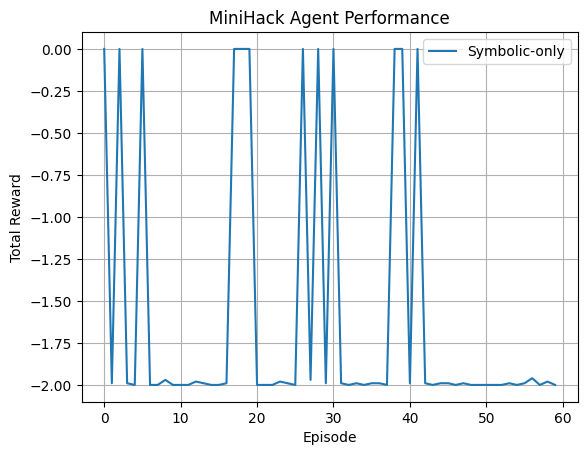

In [ ]:
import matplotlib.pyplot as plt

plt.plot(symbolic_rewards, label="Symbolic-only")
# plt.plot(rl_rewards, label="RL-only")
# plt.plot(hybrid_rewards, label="Hybrid (RL + Symbolic)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("MiniHack Agent Performance")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import gymnasium as gym

env = gym.make("MiniHack-KeyRoom-S5-v0")
obs, _ = env.reset()
print(env.render())


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                         --                                     
                                         .|                                     
                                         (|                                     
                           